Simple Linear Regression only 1 input feature and 1 output


In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Gender'].fillna(df['Gender'].mode(),inplace=True)
df['Education Level'].fillna(df['Education Level'].mode(),inplace=True)
df['Job Title'].fillna(df['Job Title'].mode(),inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].mean(),inplace=True)
df['Salary'].fillna(df['Salary'].mean(),inplace=True)

C:\Users\saiha\AppData\Local\Temp\ipykernel_13820\3882820591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\saiha\AppData\Local\Temp\ipykernel_13820\3882820591.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [6]:
df.isnull().sum()

Age                    0
Gender                 2
Education Level        2
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64

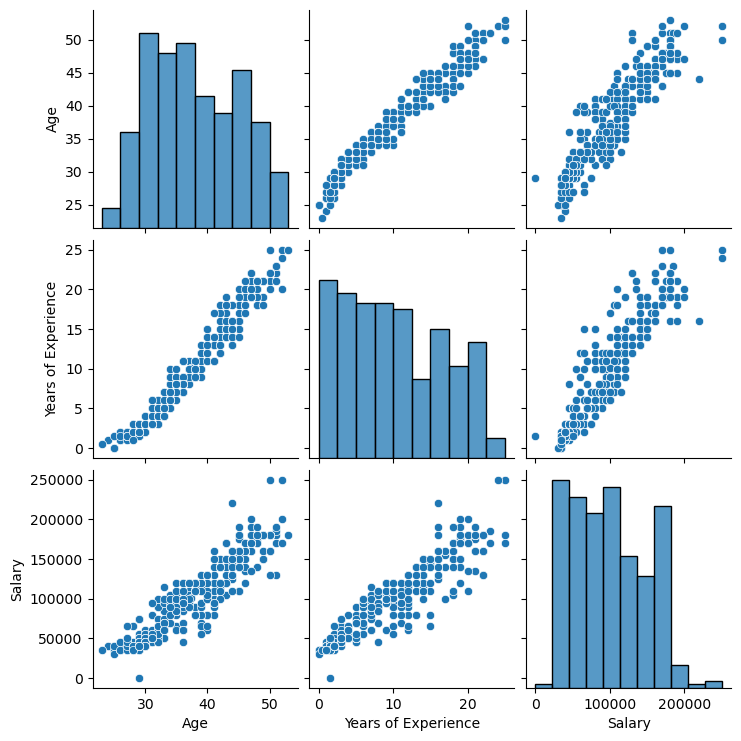

In [7]:
import seaborn as sns
sns.pairplot(df)

In [21]:
from sklearn.linear_model import LinearRegression
X=df[['Years of Experience']]
y=df['Salary']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler

X=StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
lm=LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)

r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(f'R2_Score:{r2}')
print(f'MSE:{mse}')


(5363, 1)
R2_Score:0.6528690431769462
MSE:927079077.8702136


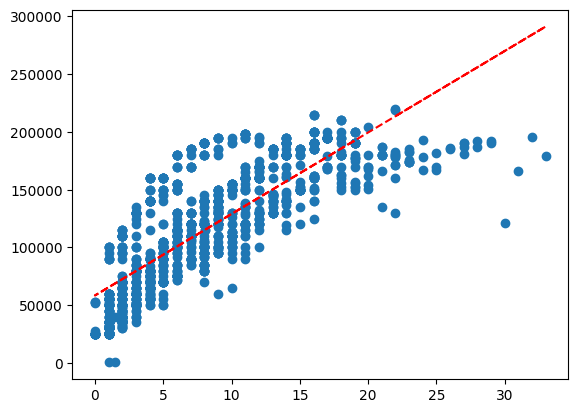

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red',linestyle='--')